In [105]:
import scipy.io as sio
import numpy as np
import mne
import matplotlib.pyplot as plt
import networkx as nx
import bct

In [7]:
eegDataMain = sio.loadmat('Data/first_ten_eeg.mat')
eegData = eegDataMain['first_ten_eeg']
eegParams = eegDataMain['params']

In [40]:
metaData = sio.loadmat('Data/metadata.mat')['metadata']

In [67]:
a = [f for f in ((metaData[0,0])[0][0])]

In [189]:
def get_graph(data):
    [conn,freqs,times,m_ep,n_tapers] = mne.connectivity.spectral_connectivity([data],method='coh', verbose=False,
                                                            faverage=True,sfreq=100,fmin=(4,20), fmax=(13,30))
    return (conn[:,:,0],conn[:,:,1])
    

def avg_clustering(graph):
    complete_graph = graph+graph.T
    clustering_coeffs = bct.clustering_coef_wu(complete_graph)
#     clustering_coeffs = bct.efficiency_wei(complete_graph)
    avg_clustering = np.nanmean(clustering_coeffs)
    return avg_clustering

def global_efficiency(graph):
    complete_graph = graph+graph.T
#     clustering_coeffs = bct.clustering_coef_wu(complete_graph)
    global_coeff = bct.efficiency_wei(complete_graph, local=False)
    return global_coeff

In [206]:
sub = 8

nTrials = np.shape(eegData)[2]
# nTrials = 1
theta_vals = np.zeros(nTrials)
alpha_vals = np.zeros(nTrials)


for trial in range(nTrials):
#     pre_stim = eegData[sub,:,trial,:200]
    post_stim = eegData[sub,:,trial,200:]
    
    theta_graph,alpha_graph = get_graph(post_stim)
    theta_vals[trial] = global_efficiency(theta_graph)
    alpha_vals[trial] = global_efficiency(alpha_graph)
    



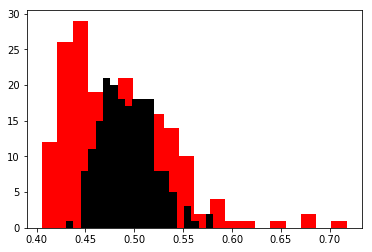

In [207]:
plt.figure()
plt.hist(alpha_vals,20, facecolor='r')
plt.hist(theta_vals,20, facecolor='k')

plt.show()

In [209]:
np.mean(alpha_vals)

0.485110949326028

In [167]:
?bct.efficiency_wei

In [187]:
a=get_graph(pre_stim)



In [212]:
data=eegData[sub,:,10,200:]
[conn,freqs,times,m_ep,n_tapers] = mne.connectivity.spectral_connectivity([data],method='coh', verbose=False,
                faverage=True,sfreq=100,fmin=(4,20), fmax=(13,30))


freqs

[array([ 4. ,  4.2,  4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,
         6.2,  6.4,  6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,
         8.4,  8.6,  8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4,
        10.6, 10.8, 11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6,
        12.8, 13. ]),
 array([20. , 20.2, 20.4, 20.6, 20.8, 21. , 21.2, 21.4, 21.6, 21.8, 22. ,
        22.2, 22.4, 22.6, 22.8, 23. , 23.2, 23.4, 23.6, 23.8, 24. , 24.2,
        24.4, 24.6, 24.8, 25. , 25.2, 25.4, 25.6, 25.8, 26. , 26.2, 26.4,
        26.6, 26.8, 27. , 27.2, 27.4, 27.6, 27.8, 28. , 28.2, 28.4, 28.6,
        28.8, 29. , 29.2, 29.4, 29.6, 29.8, 30. ])]

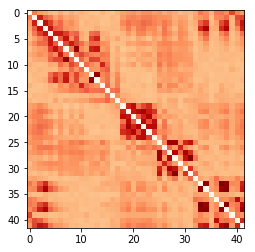

In [134]:
plt.figure()
plt.imshow(complete_graph,cmap='OrRd')
plt.show()

In [130]:
G = networkx.from_numpy_matrix(graph)

AttributeError: module 'matplotlib.cbook' has no attribute 'is_string_like'

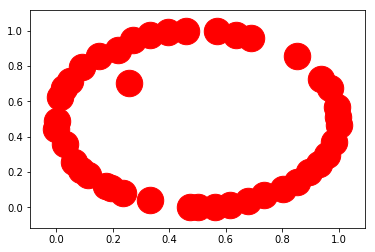

In [94]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6)

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

In [87]:
nx.clustering(G, edges=G.edges)

TypeError: clustering() got an unexpected keyword argument 'edges'

In [185]:
np.shape(a)

(42, 42, 40)

In [175]:
freqs

array([0.0448799 , 0.05385587, 0.06283185, 0.07180783, 0.08078381,
       0.08975979, 0.09873577, 0.10771175, 0.11668773, 0.12566371,
       0.13463969, 0.14361566, 0.15259164, 0.16156762, 0.1705436 ,
       0.17951958, 0.18849556, 0.19747154, 0.20644752, 0.2154235 ,
       0.22439948, 0.23337545, 0.24235143, 0.25132741, 0.26030339,
       0.26927937, 0.27825535, 0.28723133, 0.29620731, 0.30518329,
       0.31415927, 0.32313524, 0.33211122, 0.3410872 , 0.35006318,
       0.35903916, 0.36801514, 0.37699112, 0.3859671 , 0.39494308,
       0.40391906, 0.41289503, 0.42187101, 0.43084699, 0.43982297,
       0.44879895, 0.45777493, 0.46675091, 0.47572689, 0.48470287,
       0.49367885, 0.50265482, 0.5116308 , 0.52060678, 0.52958276,
       0.53855874, 0.54753472, 0.5565107 , 0.56548668, 0.57446266,
       0.58343864, 0.59241461, 0.60139059, 0.61036657, 0.61934255,
       0.62831853, 0.63729451, 0.64627049, 0.65524647, 0.66422245,
       0.67319843, 0.6821744 , 0.69115038, 0.70012636, 0.70910

In [133]:
avg_clustering

0.444656711669144

In [126]:
complete_graph

array([[ 0.        ,  0.03017852,  0.05820229, ..., -0.17126392,
         0.14659706,  0.09230171],
       [ 0.03017852,  0.        ,  0.01426388, ..., -0.13153707,
         0.07259609,  0.08129815],
       [ 0.05820229,  0.01426388,  0.        , ..., -0.05936239,
        -0.01248571,  0.02858883],
       ...,
       [-0.17126392, -0.13153707, -0.05936239, ...,  0.        ,
         0.25064714,  0.04675892],
       [ 0.14659706,  0.07259609, -0.01248571, ...,  0.25064714,
         0.        ,  0.05188048],
       [ 0.09230171,  0.08129815,  0.02858883, ...,  0.04675892,
         0.05188048,  0.        ]])